# In Class Notebook, Week 05

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2022/blob/master/week05/inClass_week05.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
# import our usual things
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
# also import widgets library
import ipywidgets

## Review from last week

In [3]:
michigan_file = '/Users/jillnaiman/Downloads/michigan_lld.flt'
# can be found with tab completes!

In [4]:
np.fromfile?

In [5]:
michigan = np.fromfile(michigan_file,dtype='f4').reshape((5365,4201))

In [12]:
michigan.reshape(5356,4201)

ValueError: cannot reshape array of size 22538365 into shape (5356,4201)

In [9]:
michigan.reshape?

In [6]:
# take out -9999 tags for missing data
michigan[michigan==-9999] = np.nan

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


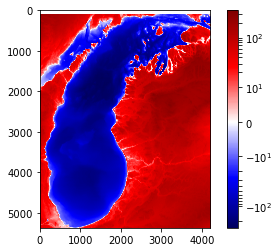

In [8]:
# step 0: even less fancy hardcoding
plt.imshow(michigan, cmap='seismic', norm=matplotlib.colors.SymLogNorm(10))
plt.colorbar() # put in a colorbar
plt.clim(-352, 352) # just to make the colormap centered around 0 (for divergent colormaps)
plt.show()

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


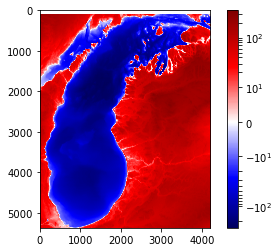

In [7]:
# step 1: hard code any parameters we may want to widgetize(?)
colormap_name = 'seismic'
take_log = True

if take_log:
    norm = matplotlib.colors.SymLogNorm(10) # symmetric log, base 10
else:
    norm = matplotlib.colors.Normalize() # "the usual" linear map
    
plt.imshow(michigan, cmap=colormap_name, norm=norm)
plt.colorbar() # put in a colorbar
plt.clim(-352, 352) # just to make the colormap centered around 0 (for divergent colormaps)
plt.show()

In [13]:
# step 2: turn this into a function with "hard coded" values as inputs
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

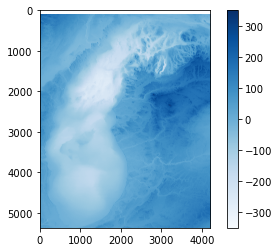

In [14]:
# step 2.5 -- try out your function!
michigan_plot('Blues',take_log=False)

In [15]:
# Step 3: use .interact to widgetize it!
@ipywidgets.interact(colormap_name=plt.colormaps(), take_log=True)
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

In [17]:
buildings = pd.read_csv('https://uiuc-ischool-dataviz.github.io/is445_spring2022/week03/data/building_inventory.csv',
                       na_values={'Square Footage':0,
                                 'Year Acquired':0, 
                                 'Year Constructed':0,
                                 'Floors':0})

In [18]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided


In [19]:
stats = buildings.groupby("Year Acquired")["Square Footage"].describe()

In [20]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

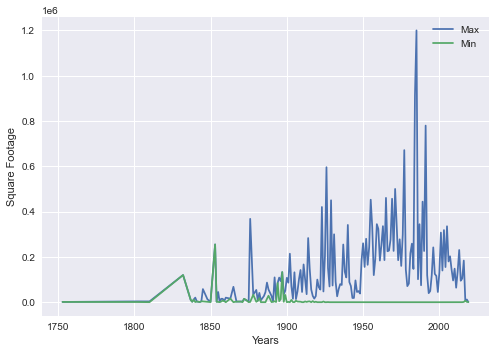

In [24]:
# step 1: hard-code something
style = 'seaborn'

with plt.style.context(style):
    plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
    plt.plot(stats['min'], label='Min')
    plt.xlabel('Years')
    plt.ylabel('Square Footage')
    plt.legend()
    plt.show()

In [23]:
stats['max']

Year Acquired
1753.0      1200.0
1802.0      3594.0
1810.0      3432.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    105000.0
2016.0    184000.0
2017.0      6720.0
2018.0     12000.0
2019.0       760.0
Name: max, Length: 171, dtype: float64

In [25]:
# step 2 -- make into a function
#style = 'seaborn'

def make_buildings_plot(style):
    with plt.style.context(style):
        plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        plt.plot(stats['min'], label='Min')
        plt.xlabel('Years')
        plt.ylabel('Square Footage')
        plt.legend()
        plt.show()

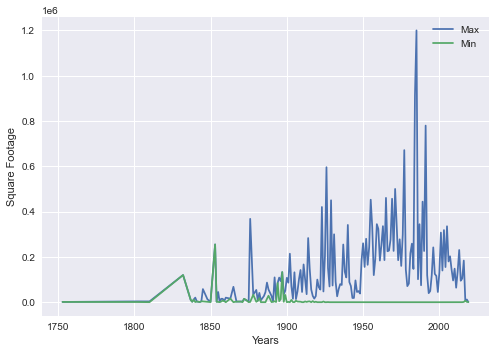

In [26]:
# 2.5 test the function
make_buildings_plot('seaborn')

In [32]:
# step 3: widgetize it!

@ipywidgets.interact(style=plt.style.available)
def make_buildings_plot(style):
    with plt.style.context(style):
        plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        plt.plot(stats['min'], label='Min')
        #plt.plot(stats['max']*2)
        plt.xlabel('Years')
        plt.ylabel('Square Footage')
        #plt.yscale('log')
        plt.legend()
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

In [ ]:
@ipywidgets.interact(style=plt.style.available)
def make_buildings_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        ax.plot(stats['min'], label='Min')
        ax.set_xlabel('Years')
        ax.set_ylabel('Square Footage')
        #plt.yscale('log')
        ax.legend()
        plt.show()

## Widgets on their own